In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

In [7]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
fakeNews=pd.read_csv("/content/drive/MyDrive/News _dataset/Fake.csv")
trueNews=pd.read_csv("/content/drive/MyDrive/News _dataset/True.csv")

In [ ]:
fakeNews.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
trueNews.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [9]:
fakeNews["class"] = 0
trueNews["class"] = 1

In [10]:
# shape of both the dataset
trueNews.shape, fakeNews.shape

((21417, 5), (23481, 5))

In [11]:
# Combine datasets
merged_data = pd.concat([fakeNews, trueNews], axis=0)
merged_data.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [12]:
# Remove unwanted columns
dataframe = merged_data.drop(["title", "subject", "date"], axis=1)

In [13]:
# Check for null values
print(dataframe.isnull().sum())

text     0
class    0
dtype: int64


In [14]:
# Shuffle the dataset and reset the index
dataframe = dataframe.sample(frac=1).reset_index(drop=True)
dataframe.head()

,text,class
0,(Reuters) - Three appeals court judges appoint...,1
1,"In 2017, Kelli O Brien, the aunt of Joshua Boy...",0
2,(Reuters) - A man suspected of shooting an Ida...,1
3,WASHINGTON (Reuters) - The U.S. Senate on Mond...,1
4,Daily Shooter 21st Century WireThe Dallas Snip...,0


In [15]:
#function to clean text
custom_stopwords = set(stopwords.words('english')) - {'not', 'no', 'because', 'since'}

def wordopt(text):
 # Lowercasing
    text = text.lower()

    # Removing special characters and punctuations
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)

    # Removing URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # Removing HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Removing numbers
    text = re.sub(r'\w*\d\w*', '', text)



    # Tokenization
    tokens = word_tokenize(text)

    # Stopword removal
    tokens = [word for word in tokens if word not in custom_stopwords]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

In [16]:
dataframe['text']=dataframe['text'].apply(wordopt)

In [17]:
dataframe.head()

,text,class
0,reuters three appeal court judge appointed dem...,1
1,kelli brien aunt joshua boyle spoke publicly k...,0
2,reuters man suspected shooting idaho pastor le...,1
3,washington reuters u senate monday blocked dem...,1
4,daily shooter century wirethe dallas sniper pr...,0


In [18]:
# Spliting data into features and target
X = dataframe['text']
y = dataframe['class']

In [19]:
# Converting text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)



In [21]:
# logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
y_pred = model.predict(X_test)

In [23]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4638
           1       0.98      0.99      0.98      4342

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [24]:
#random forest classifier
from sklearn.ensemble import RandomForestClassifier


RFC = RandomForestClassifier(random_state=0)
RFC.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [28]:
pred_rfc = RFC.predict(X_test)
RFC.score(X_test, y_test)

0.9973273942093541

In [ ]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4686
           1       0.99      1.00      1.00      4294

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [25]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
pred_dt=DT.predict(X_test)
DT.score(X_test,y_test)

0.995879732739421

In [31]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4638
           1       1.00      0.99      1.00      4342

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [33]:
import pandas as pd

report_log = classification_report(y_test, y_pred, output_dict=True)
report_rf = classification_report(y_test,pred_rfc, output_dict=True)
report_dt = classification_report(y_test, pred_dt, output_dict=True)
# Converting classification reports to DataFrames
df_log = pd.DataFrame(report_log).transpose()
df_rf = pd.DataFrame(report_rf).transpose()
df_dt = pd.DataFrame(report_dt).transpose()


df_log['model'] = 'Logistic Regression'
df_rf['model'] = 'Random Forest'
df_dt['model'] = 'Decision Tree'

# Concatenate the DataFrames
df = pd.concat([df_log, df_rf, df_dt])

<ipython-input-34-497e8f1e332b>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='index', y='value', hue='model', data=df_melted, ci=None)


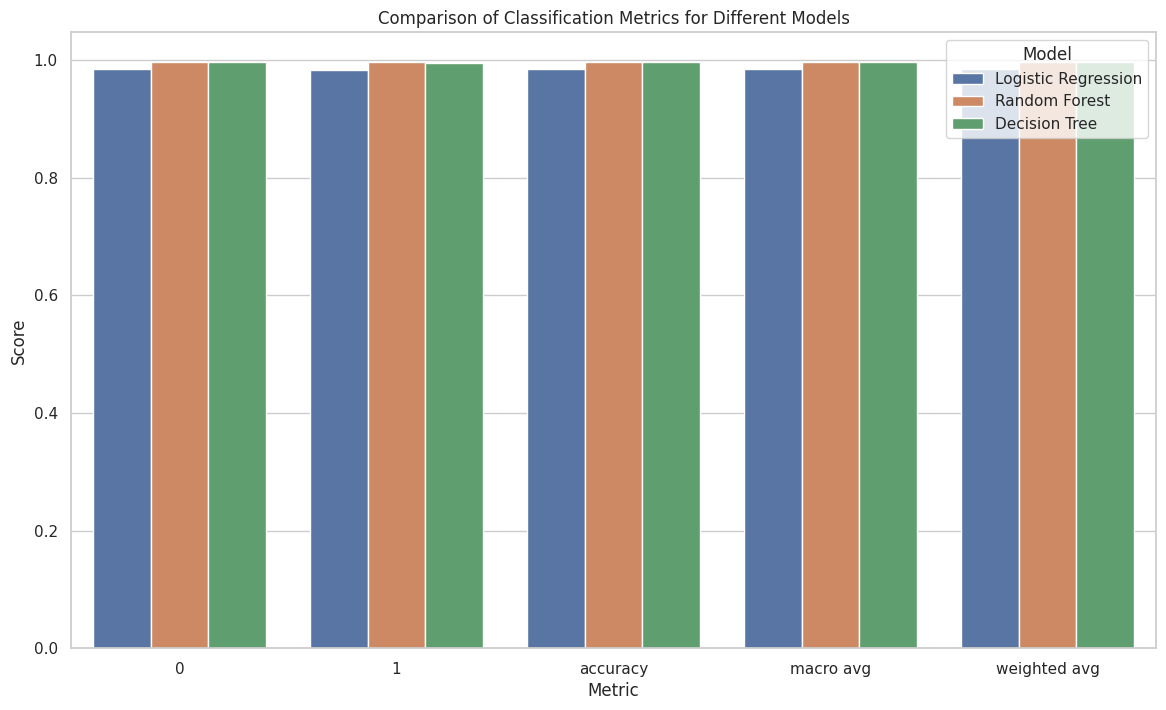

In [34]:
# Set the style for the plots
sns.set(style="whitegrid")

# Melt the DataFrame for easy plotting
df_melted = df.reset_index().melt(id_vars=['index', 'model'], value_vars=['precision', 'recall', 'f1-score'])

# Plot the comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='index', y='value', hue='model', data=df_melted, ci=None)
plt.title('Comparison of Classification Metrics for Different Models')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.legend(title='Model')
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, log_loss

def evaluate_model(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    loss = log_loss(y_true, y_pred)
    return rmse, mae, r2, accuracy, loss

# Evaluate Logistic Regression
rmse_log, mae_log, r2_log, acc_log, loss_log = evaluate_model(y_test, y_pred)
# Evaluate Random Forest
rmse_rf, mae_rf, r2_rf, acc_rf, loss_rf = evaluate_model(y_test, pred_rfc)
# Evaluate Decision Tree
rmse_dt, mae_dt, r2_dt, acc_dt, loss_dt = evaluate_model(y_test, pred_dt)

In [37]:
# Create a DataFrame with the metrics
metrics_data = {
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'RMSE': [rmse_log, rmse_rf, rmse_dt],
    'MAE': [mae_log, mae_rf, mae_dt],
    'R² Score': [r2_log, r2_rf, r2_dt],
    'Accuracy': [acc_log, acc_rf, acc_dt],
    'Loss': [loss_log, loss_rf, loss_dt]
}
df_metrics = pd.DataFrame(metrics_data)

<ipython-input-38-024a6b47cdd1>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='variable', y='value', hue='Model', data=df_melted, ci=None)


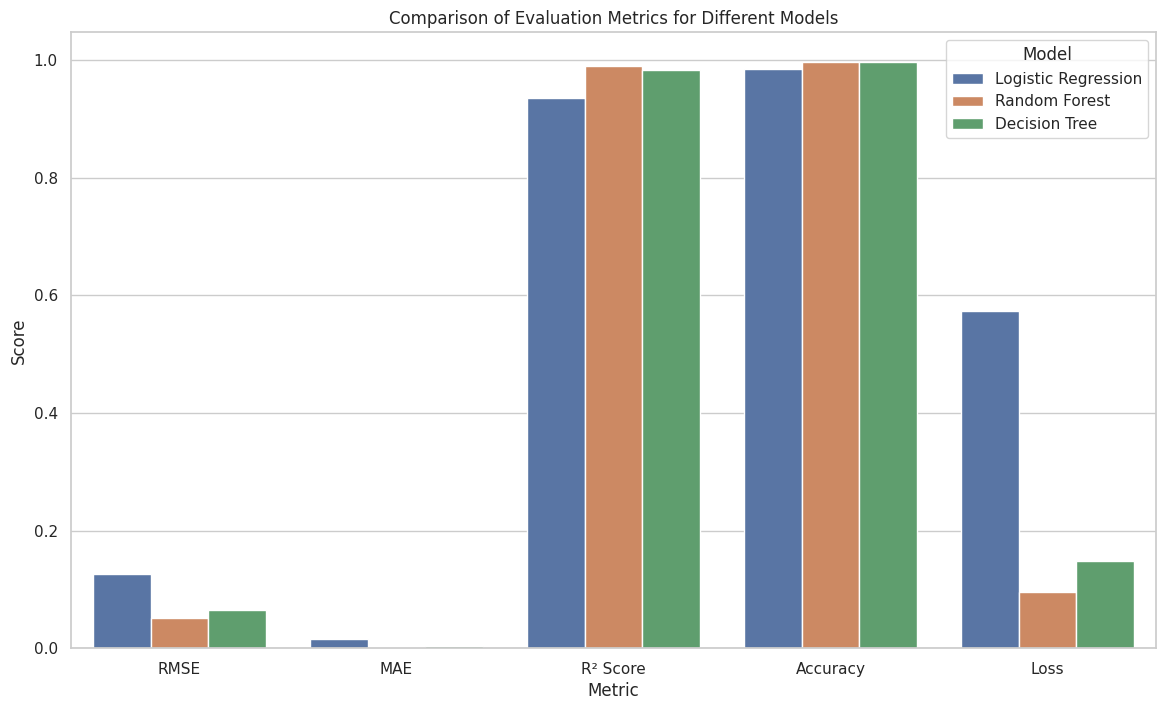

In [38]:
# Set the style for the plots
sns.set(style="whitegrid")

# Melt the DataFrame for easy plotting
df_melted = df_metrics.melt(id_vars=['Model'], value_vars=['RMSE', 'MAE', 'R² Score', 'Accuracy', 'Loss'])

# Plot the comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='variable', y='value', hue='Model', data=df_melted, ci=None)
plt.title('Comparison of Evaluation Metrics for Different Models')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.legend(title='Model')
plt.show()